5
SGD
DP-SGD
D2P-SGD
DP2-SGD
D2P2-SGD


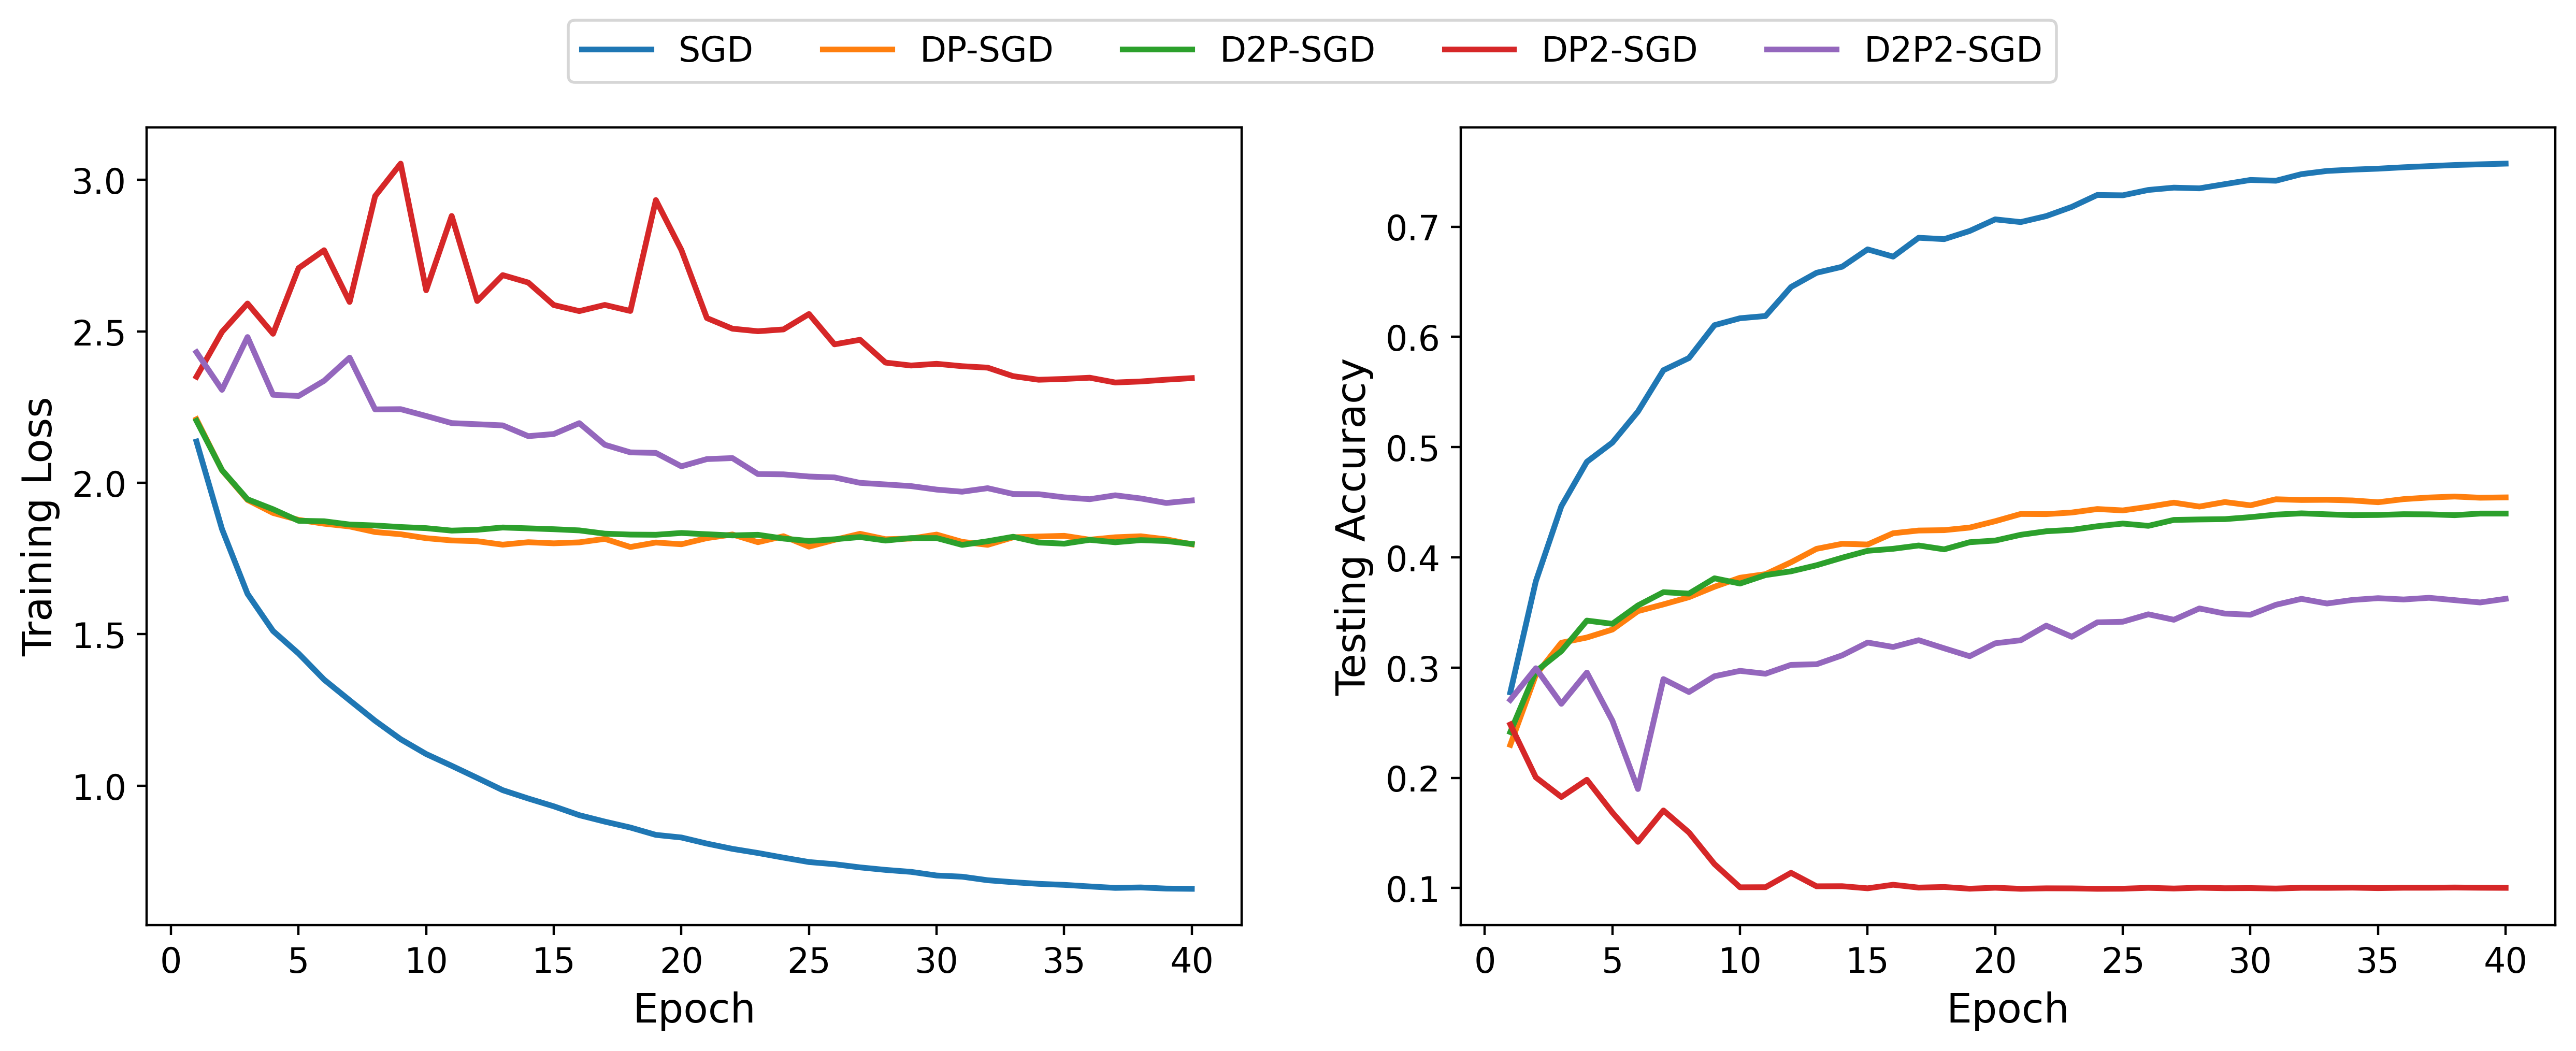

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

with open('log/CNN_cifar/P100_2024-05-20 19:09:02_sigma_1.0_batch_512_seed_44.json', 'r') as file:
    train_results = json.load(file)

legend_names = {
    'SGD': 'SGD',
    'DP-SGD (static)': 'DP-SGD',
    'DP-SGD (dynamic)': 'D2P-SGD',
    'DP-SGD (RP)': 'DP2-SGD',
    'DP-SGD (d2p2)': 'D2P2-SGD'
}

epochs = range(1, int(len(next(iter(train_results.values()))[0])) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=400)
print(len(train_results.items()))

# Plot training losses
for optim, (train_losses, accuracy_per_epoch, epsilons, duration) in train_results.items():
    epochs = range(1, len(train_losses) + 1)
    label = legend_names.get(optim, optim)
    print(label)
    axs[0].plot(epochs, train_losses, label=label, linewidth=2)

axs[0].set_xlabel('Epoch', fontsize=14)
axs[0].set_ylabel('Training Loss', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
# axs[0].legend(loc='upper right', fontsize=10)
fig.legend(loc='upper center', fontsize=12, bbox_to_anchor=(0.5, 1), ncol=5)
# Plot testing accuracies
for optim, (train_losses, accuracy_per_epoch, epsilons, duration) in train_results.items():
    epochs = range(1, len(accuracy_per_epoch) + 1)
    label = legend_names.get(optim, optim) 
    axs[1].plot(epochs, accuracy_per_epoch, label=label, linewidth=2)

axs[1].set_xlabel('Epoch', fontsize=14)
axs[1].set_ylabel('Testing Accuracy', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()

    # current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # filename = f'log/CNN_Fmnist/{current_time}_sigma_{sigma}_batch_{batch_size}_seed_{seed}'
    # fig.suptitle(f'CNN_FashionMNIST_sigma_{sigma}_batch_{batch_size}', fontsize=16)
    # plt.savefig(f"{filename}.png")

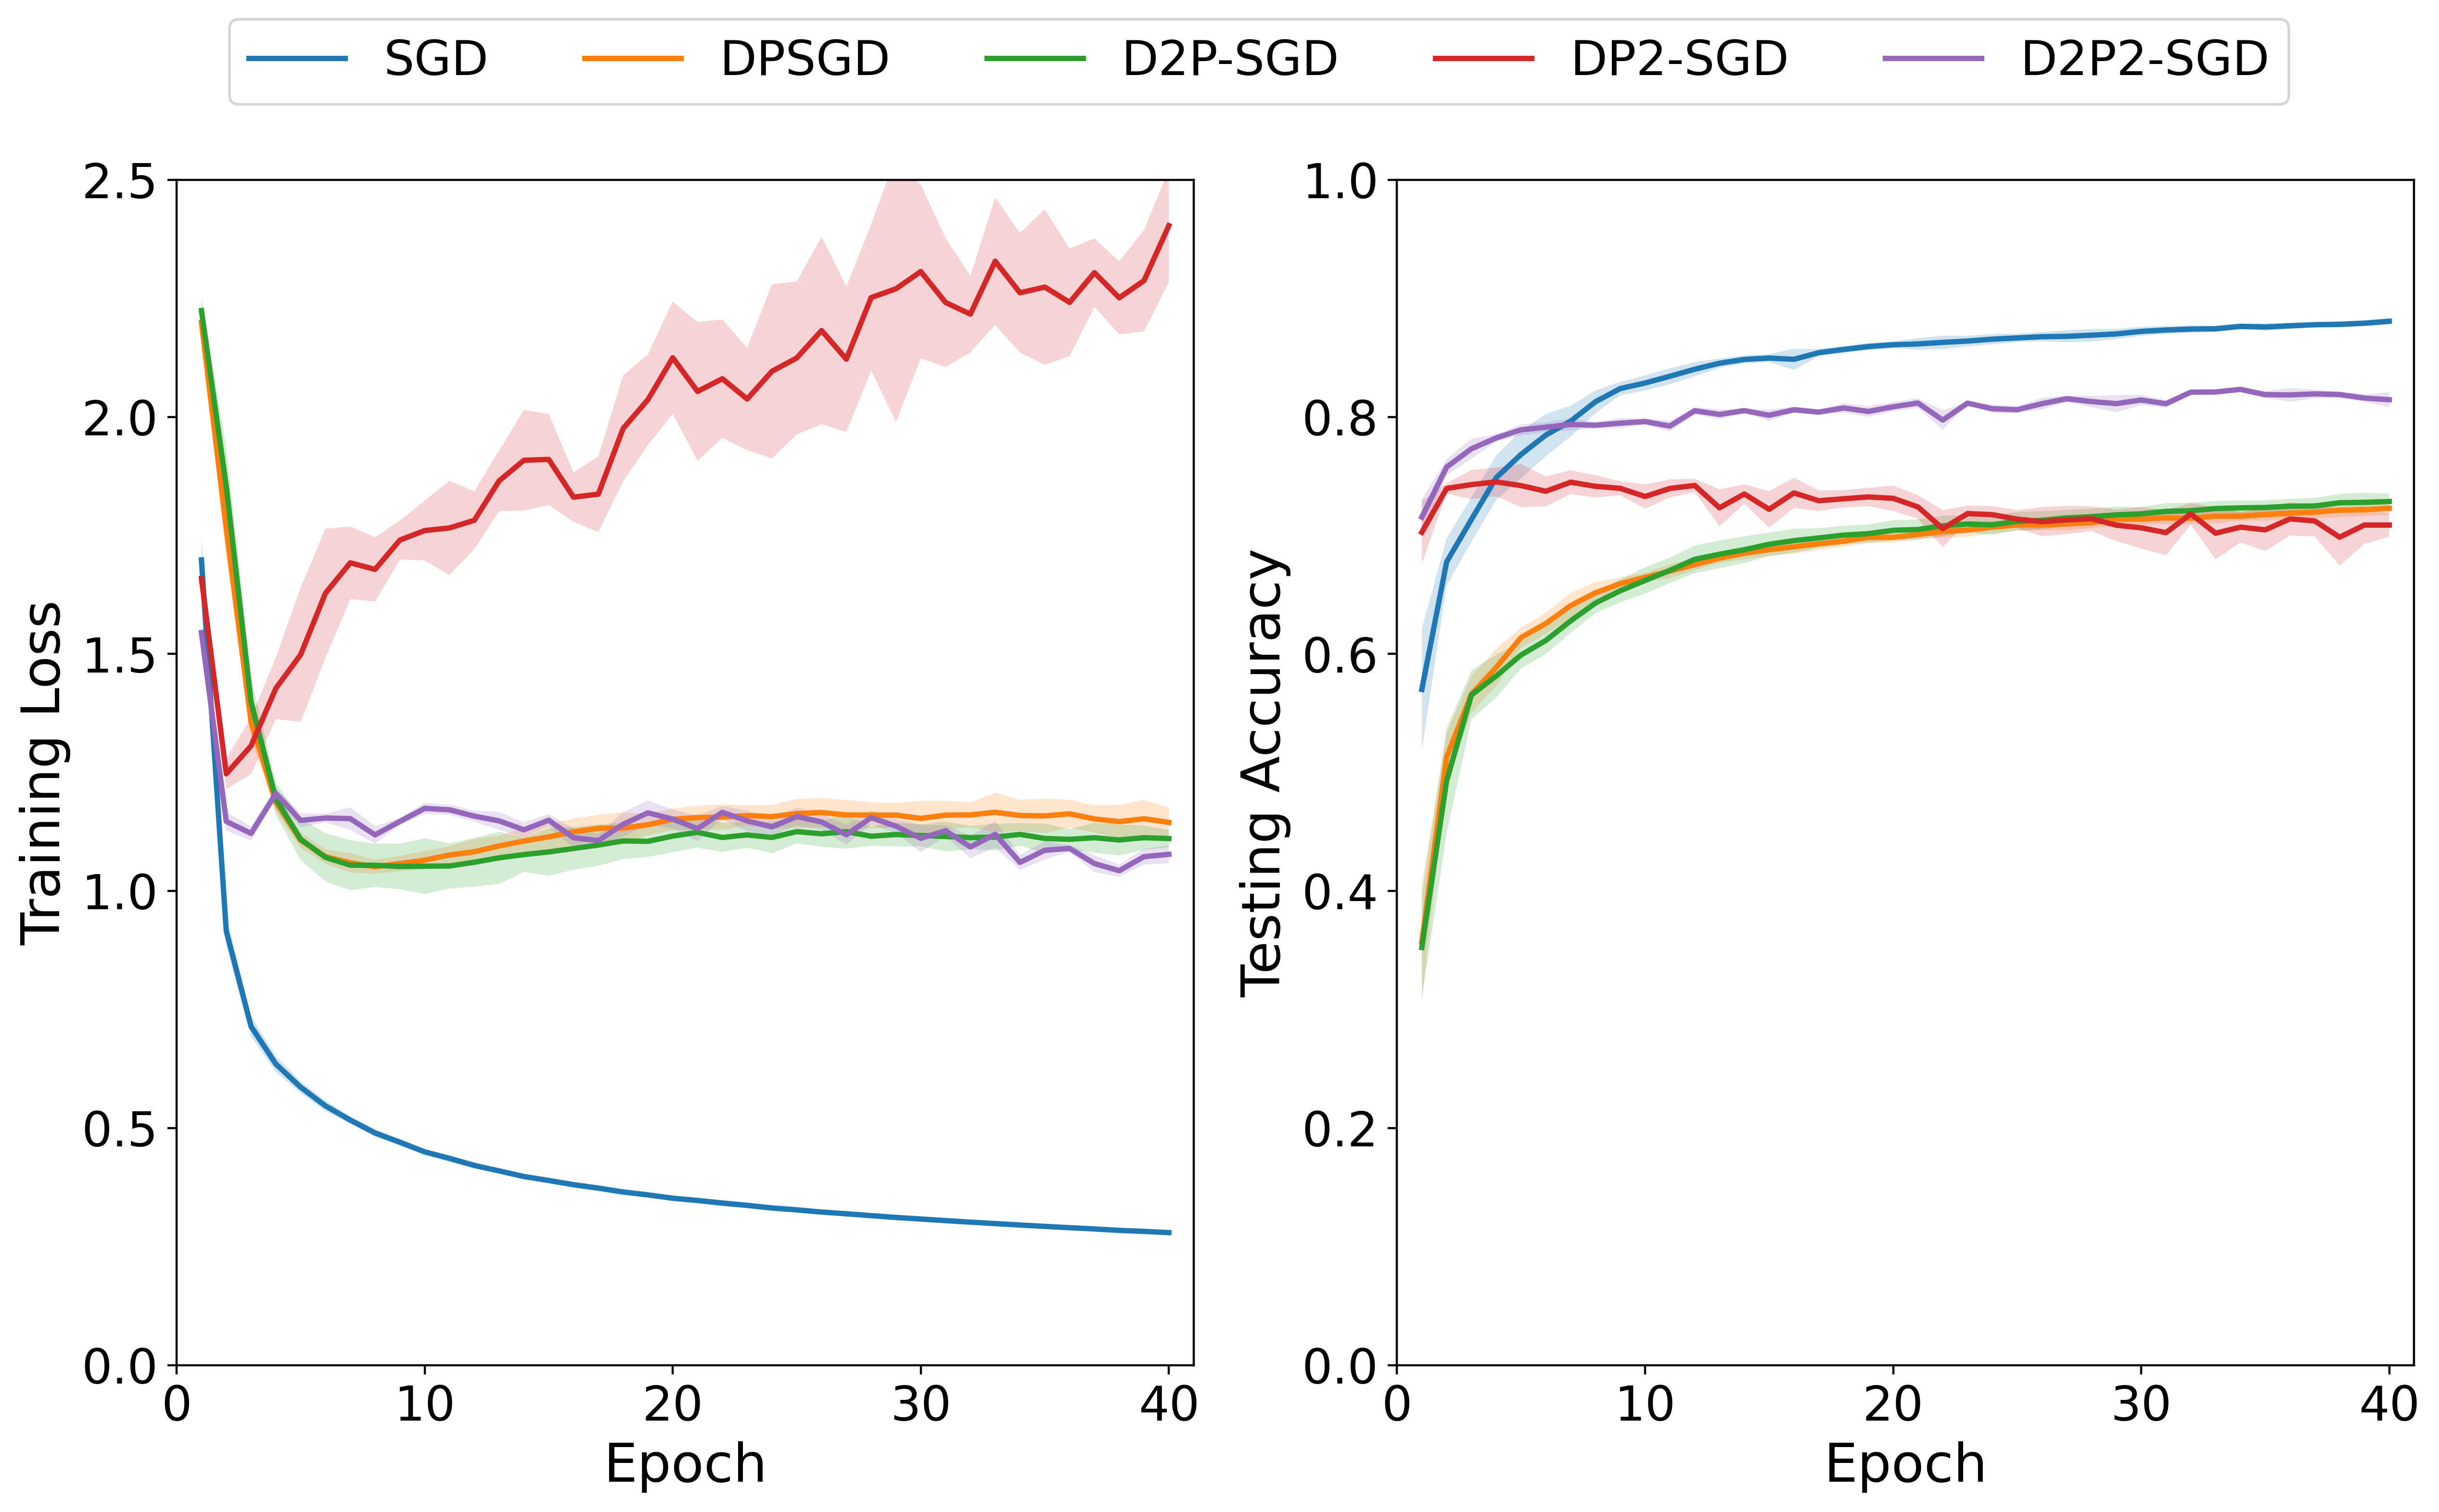

In [30]:
import os
import json
import glob
import argparse
import matplotlib.pylab as plt
import numpy as np
import torch
from collections import OrderedDict
import torch.backends.cudnn as cudnn


def plot_results(file_paths):
    

    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    # Load data from the JSON files
    all_train_losses = []
    all_accuracy_per_epoch = []

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            train_results = json.load(file)
            
            train_losses = []
            accuracy_per_epoch = []
            epsilons = []
            
            for optim, data in train_results.items():
                losses = data['loss']
                acc = data['acc']
                eps = data['ep']
                train_losses.append(losses)
                accuracy_per_epoch.append(acc)
                epsilons.append(eps)
            
            all_train_losses.append(train_losses)
            all_accuracy_per_epoch.append(accuracy_per_epoch)

    # Convert lists to numpy arrays for easier manipulation
    all_train_losses = np.array(all_train_losses)
    all_accuracy_per_epoch = np.array(all_accuracy_per_epoch)

    # Calculate mean and variance
    mean_train_losses = np.mean(all_train_losses, axis=0)
    var_train_losses = np.var(all_train_losses, axis=0)
    mean_accuracy_per_epoch = np.mean(all_accuracy_per_epoch, axis=0)
    var_accuracy_per_epoch = np.var(all_accuracy_per_epoch, axis=0)


    epochs = range(1, mean_train_losses.shape[1] + 1)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=400)

    # Plot training losses
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_losses = mean_train_losses[i]
        std_losses = np.sqrt(var_train_losses[i])
        # color = list_color[i % len(list_color)]
        axs[0].plot(epochs, mean_losses, label=label, linewidth=2)
        axs[0].fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, alpha=0.2)

    axs[0].set_xlabel('Epoch', fontsize=20)
    axs[0].set_ylabel('Training Loss', fontsize=20)
    axs[0].tick_params(axis='both', which='major', labelsize=18)
    axs[0].set_xlim([0, len(epochs) + 1])
    axs[0].set_ylim([0, 2.5])
    fig.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.5, 1), ncol=5)

    # Plot testing accuracies
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_acc = mean_accuracy_per_epoch[i]
        std_acc = np.sqrt(var_accuracy_per_epoch[i])
        # color = list_color[i % len(list_color)]
        axs[1].plot(epochs, mean_acc, label=label, linewidth=2)
        axs[1].fill_between(epochs, mean_acc - std_acc, mean_acc + std_acc, alpha=0.2)

    axs[1].set_xlabel('Epoch', fontsize=20)
    axs[1].set_ylabel('Testing Accuracy', fontsize=20)
    axs[1].tick_params(axis='both', which='major', labelsize=18)
    axs[1].set_xlim([0, len(epochs) + 1])
    axs[1].set_ylim([0, 1.0])
    axs[1].set_yticks(np.arange(0, 1.1, 0.2))

    plt.show()
    # plt.savefig('final/CNN_Fmnist/CNN_Fmnist_b1024_sigma_3.pdf', bbox_inches='tight', dpi=400)

file_paths = glob.glob(os.path.join('final/CNN_Fmnist', '*.json'))
plot_results(file_paths)


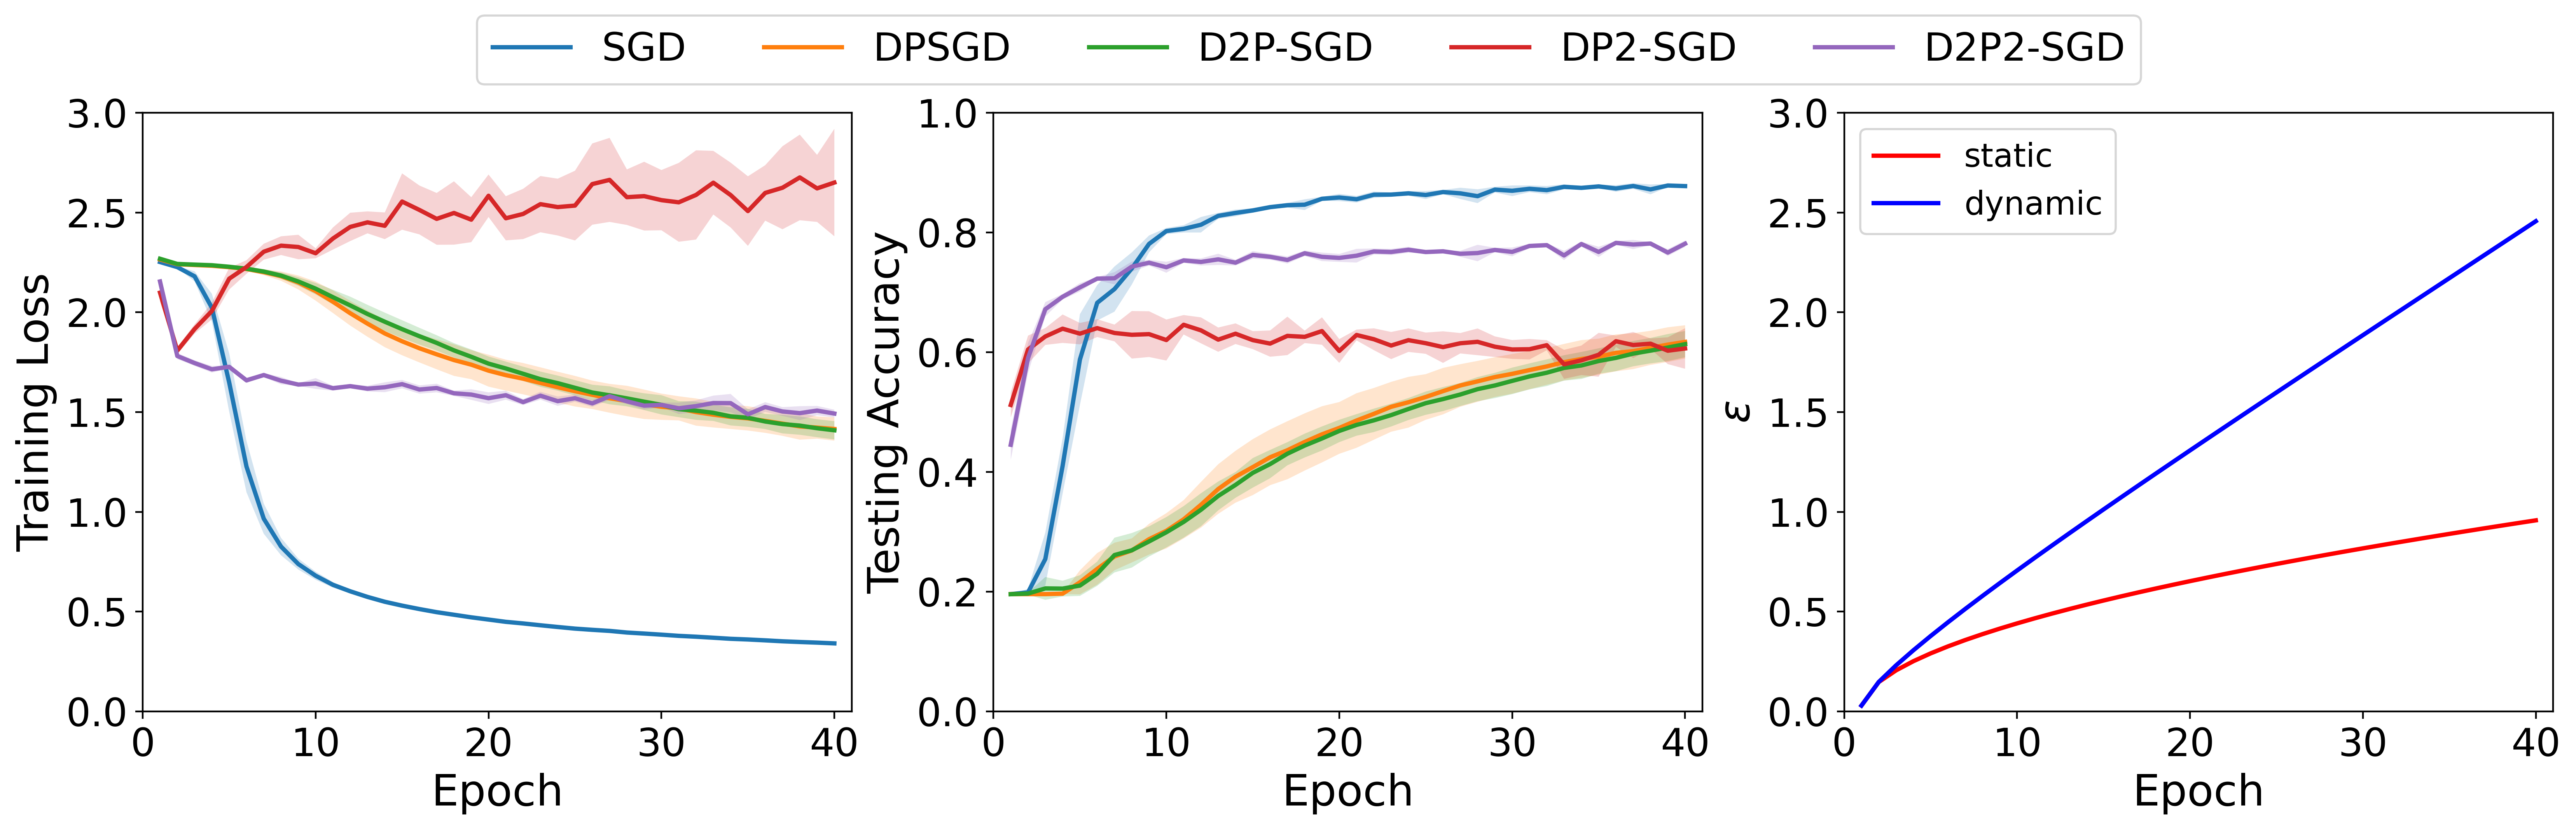

In [155]:
import os
import json
import glob
import argparse
import matplotlib.pylab as plt
import numpy as np
import torch
from collections import OrderedDict
import torch.backends.cudnn as cudnn


def plot_results(file_paths):
    

    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    # Load data from the JSON files
    all_train_losses = []
    all_accuracy_per_epoch = []
    all_epsilons =[]

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            train_results = json.load(file)
            
            train_losses = []
            accuracy_per_epoch = []
            epsilons = []
            
            for optim, data in train_results.items():
                losses = data['loss']
                acc = data['acc']
                eps = data['ep']
                train_losses.append(losses)
                accuracy_per_epoch.append(acc)
                epsilons.append(eps)
            
            all_train_losses.append(train_losses)
            all_accuracy_per_epoch.append(accuracy_per_epoch)
            all_epsilons.append(epsilons)

    # Convert lists to numpy arrays for easier manipulation
    all_train_losses = np.array(all_train_losses)
    all_accuracy_per_epoch = np.array(all_accuracy_per_epoch)
    all_epsilons = np.array(all_epsilons)

    # Calculate mean and variance
    mean_train_losses = np.mean(all_train_losses, axis=0)
    var_train_losses = np.var(all_train_losses, axis=0)
    mean_accuracy_per_epoch = np.mean(all_accuracy_per_epoch, axis=0)
    var_accuracy_per_epoch = np.var(all_accuracy_per_epoch, axis=0)
    mean_epsilons = np.mean(all_epsilons, axis=0)
    var_epsilons = np.var(all_epsilons, axis=0)


    epochs = range(1, mean_train_losses.shape[1] + 1)
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=400)

    # Plot training losses
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_losses = mean_train_losses[i]
        std_losses = np.sqrt(var_train_losses[i])
        # color = list_color[i % len(list_color)]
        axs[0].plot(epochs, mean_losses, label=label, linewidth=2)
        axs[0].fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, alpha=0.2)

    axs[0].set_xlabel('Epoch', fontsize=20)
    axs[0].set_ylabel('Training Loss', fontsize=20)
    axs[0].tick_params(axis='both', which='major', labelsize=18)
    axs[0].set_xlim([0, len(epochs) + 1])
    axs[0].set_ylim([0, 3.0])
    fig.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.5, 1.03), ncol=5)

    # Plot testing accuracies
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_acc = mean_accuracy_per_epoch[i]
        std_acc = np.sqrt(var_accuracy_per_epoch[i])
        
        # color = list_color[i % len(list_color)]
        axs[1].plot(epochs, mean_acc, label=label, linewidth=2)
        axs[1].fill_between(epochs, mean_acc - std_acc, mean_acc + std_acc, alpha=0.2)

    axs[1].set_xlabel('Epoch', fontsize=20)
    axs[1].set_ylabel('Testing Accuracy', fontsize=20)
    axs[1].tick_params(axis='both', which='major', labelsize=18)
    axs[1].set_xlim([0, len(epochs) + 1])
    axs[1].set_ylim([0, 1.0])
    axs[1].set_yticks(np.arange(0, 1.1, 0.2))

    # Plot epsilons
    colors = ['#FF0000', '#0000FF']  # Red for static, Blue for dynamic
    labels = ["static", "dynamic"]
    
    for i, (optim, _) in enumerate(train_results.items()):
        if 'static' in optim or 'dynamic' in optim:
            label = labels[0] if 'static' in optim else labels[1]
            color = colors[0] if 'static' in optim else colors[1]
            mean_eps = mean_epsilons[i]
            std_eps = np.sqrt(var_epsilons[i])
            axs[2].plot(epochs, mean_eps, label=label, linewidth=2, color=color)
            axs[2].fill_between(epochs, mean_eps - std_eps, mean_eps + std_eps, color=color, alpha=0.2)

    axs[2].set_xlabel('Epoch', fontsize=20)
    axs[2].set_ylabel(r'$\epsilon$', fontsize=20)
    axs[2].tick_params(axis='both', which='major', labelsize=18)
    axs[2].set_xlim([0, len(epochs) + 1])
    axs[2].set_ylim([0, 3.0])
    axs[2].legend(loc='upper left', fontsize=15)

    # plt.show()
    plt.savefig('final/CNN_svhn/CNN_svhn_b1024_sigma_3.pdf', bbox_inches='tight', dpi=400)

file_paths = glob.glob(os.path.join('final/CNN_svhn', '*.json'))
plot_results(file_paths)


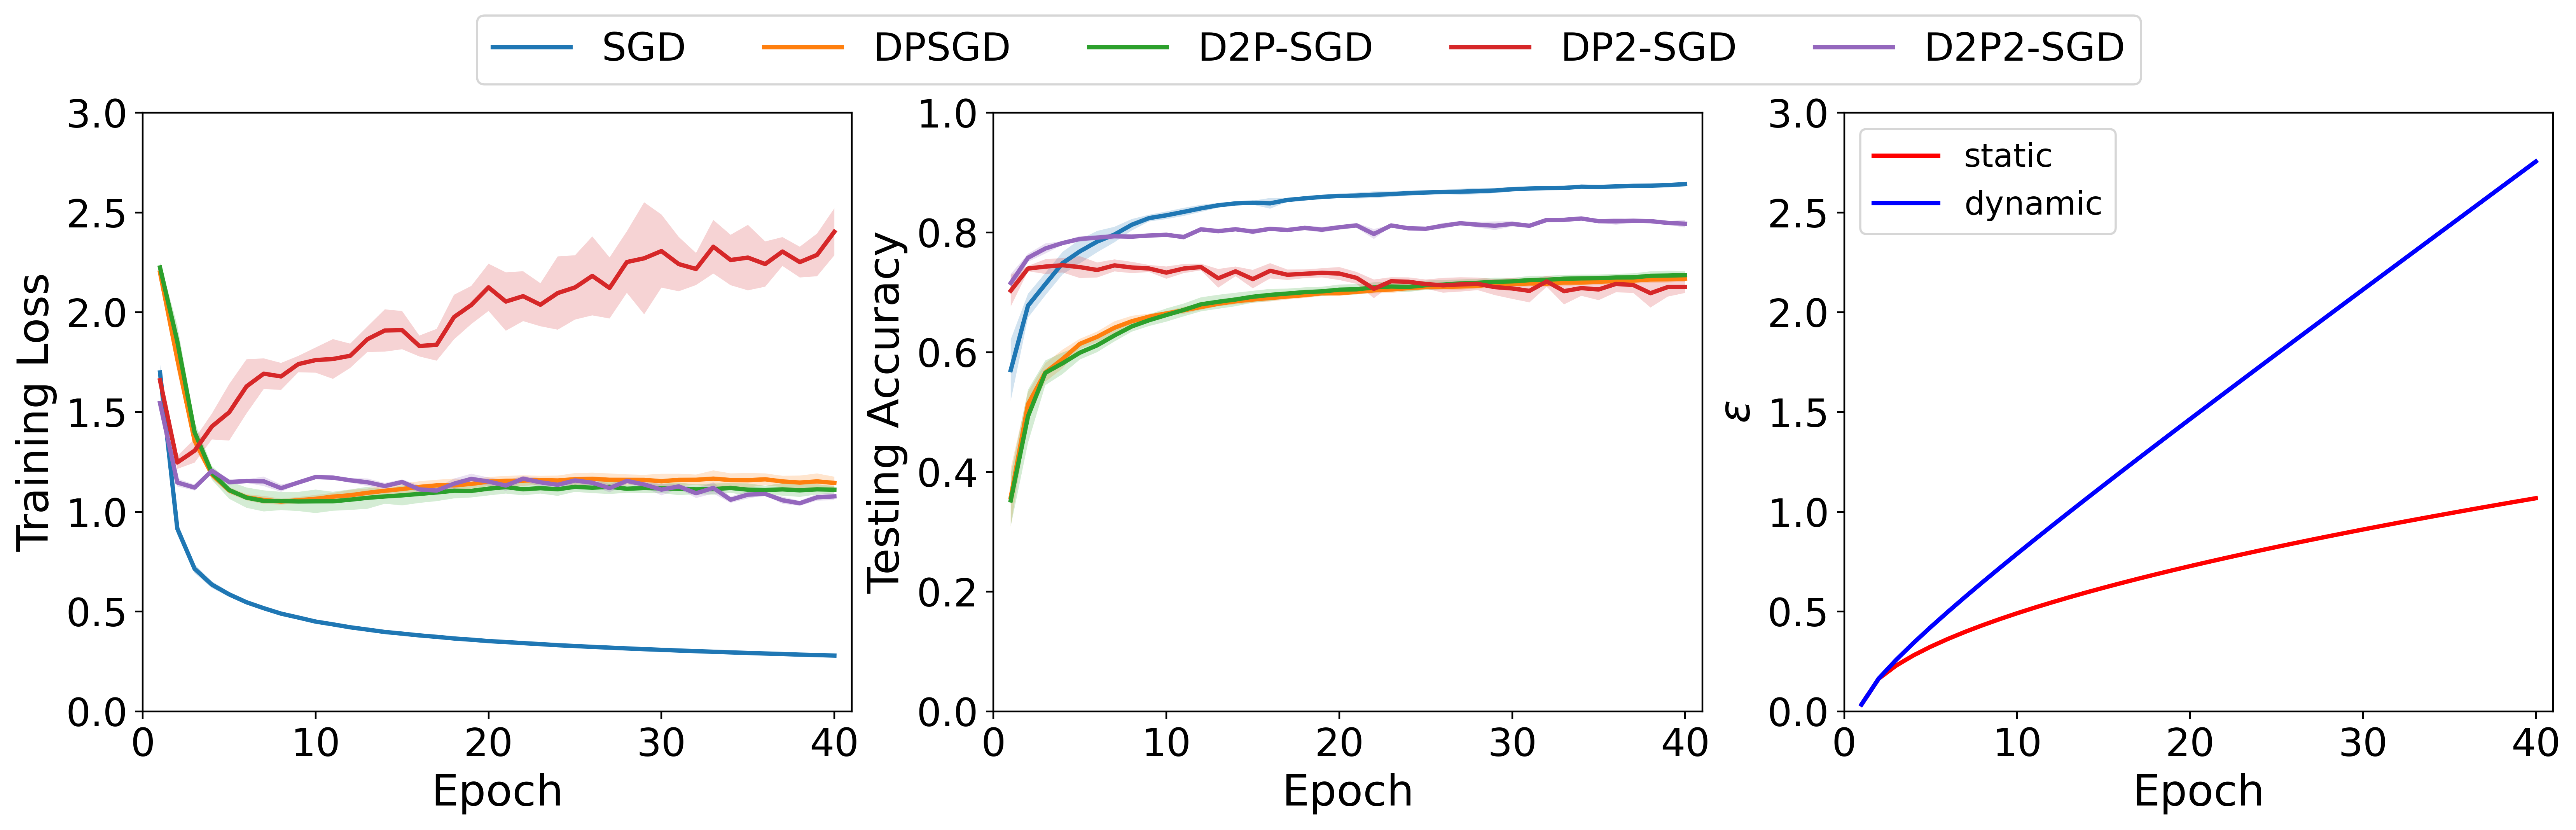

In [159]:
import os
import json
import glob
import argparse
import matplotlib.pylab as plt
import numpy as np
import torch
from collections import OrderedDict
import torch.backends.cudnn as cudnn


def plot_results(file_paths):
    

    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    # Load data from the JSON files
    all_train_losses = []
    all_accuracy_per_epoch = []
    all_epsilons =[]

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            train_results = json.load(file)
            
            train_losses = []
            accuracy_per_epoch = []
            epsilons = []
            
            for optim, data in train_results.items():
                losses = data['loss']
                acc = data['acc']
                eps = data['ep']
                train_losses.append(losses)
                accuracy_per_epoch.append(acc)
                epsilons.append(eps)
            
            all_train_losses.append(train_losses)
            all_accuracy_per_epoch.append(accuracy_per_epoch)
            all_epsilons.append(epsilons)

    # Convert lists to numpy arrays for easier manipulation
    all_train_losses = np.array(all_train_losses)
    all_accuracy_per_epoch = np.array(all_accuracy_per_epoch)
    all_epsilons = np.array(all_epsilons)

    # Calculate mean and variance
    mean_train_losses = np.mean(all_train_losses, axis=0)
    var_train_losses = np.var(all_train_losses, axis=0)
    mean_accuracy_per_epoch = np.mean(all_accuracy_per_epoch, axis=0)
    var_accuracy_per_epoch = np.var(all_accuracy_per_epoch, axis=0)
    mean_epsilons = np.mean(all_epsilons, axis=0)
    var_epsilons = np.var(all_epsilons, axis=0)


    epochs = range(1, mean_train_losses.shape[1] + 1)
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=400)

    # Plot training losses
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_losses = mean_train_losses[i]
        std_losses = np.sqrt(var_train_losses[i])
        # color = list_color[i % len(list_color)]
        axs[0].plot(epochs, mean_losses, label=label, linewidth=2)
        axs[0].fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, alpha=0.2)

    axs[0].set_xlabel('Epoch', fontsize=20)
    axs[0].set_ylabel('Training Loss', fontsize=20)
    axs[0].tick_params(axis='both', which='major', labelsize=18)
    axs[0].set_xlim([0, len(epochs) + 1])
    axs[0].set_ylim([0, 3.0])
    fig.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.5, 1.03), ncol=5)

    # Plot testing accuracies
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_acc = mean_accuracy_per_epoch[i]
        std_acc = np.sqrt(var_accuracy_per_epoch[i])
        
        # color = list_color[i % len(list_color)]
        axs[1].plot(epochs, mean_acc, label=label, linewidth=2)
        axs[1].fill_between(epochs, mean_acc - std_acc, mean_acc + std_acc, alpha=0.2)

    axs[1].set_xlabel('Epoch', fontsize=20)
    axs[1].set_ylabel('Testing Accuracy', fontsize=20)
    axs[1].tick_params(axis='both', which='major', labelsize=18)
    axs[1].set_xlim([0, len(epochs) + 1])
    axs[1].set_ylim([0, 1.0])
    axs[1].set_yticks(np.arange(0, 1.1, 0.2))

    # Plot epsilons
    colors = ['#FF0000', '#0000FF']  # Red for static, Blue for dynamic
    labels = ["static", "dynamic"]
    
    for i, (optim, _) in enumerate(train_results.items()):
        if 'static' in optim or 'dynamic' in optim:
            label = labels[0] if 'static' in optim else labels[1]
            color = colors[0] if 'static' in optim else colors[1]
            mean_eps = mean_epsilons[i]
            std_eps = np.sqrt(var_epsilons[i])
            axs[2].plot(epochs, mean_eps, label=label, linewidth=2, color=color)
            axs[2].fill_between(epochs, mean_eps - std_eps, mean_eps + std_eps, color=color, alpha=0.2)

    axs[2].set_xlabel('Epoch', fontsize=20)
    axs[2].set_ylabel(r'$\epsilon$', fontsize=20)
    axs[2].tick_params(axis='both', which='major', labelsize=18)
    axs[2].set_xlim([0, len(epochs) + 1])
    axs[2].set_ylim([0, 3.0])
    axs[2].legend(loc='upper left', fontsize=15)

    # plt.show()
    plt.savefig('final/CNN_Fmnist/CNN_Fmnist_b1024_sigma_3.pdf', bbox_inches='tight', dpi=400)

file_paths = glob.glob(os.path.join('final/CNN_Fmnist', '*.json'))
plot_results(file_paths)


In [92]:
import os
import json
import glob
import argparse
import matplotlib.pylab as plt
import numpy as np
import torch
from collections import OrderedDict
import torch.backends.cudnn as cudnn


def plot_results(file_paths):
    
    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    # Load data from the JSON files
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            sigma = file_path.split('sigma_')[1].split('_')[0]
            train_results = json.load(file)
            print(sigma)         
            for optim, data in train_results.items():
                print(optim)
                acc = data['acc'][-1]
                print(acc)


            #     accuracy_per_epoch.append(acc)
            #     epsilons.append(eps)
            # print(len(accuracy_per_epoch))
            
    #         all_accuracy_per_epoch.append(accuracy_per_epoch)
    #         all_epsilons.append(epsilons)
    
    # print((all_accuracy_per_epoch))



    plt.show()
    # plt.savefig('final/CNN_Fmnist/CNN_Fmnist_b1024_sigma_3.pdf', bbox_inches='tight', dpi=400)

file_paths = glob.glob(os.path.join('ab1/CNN_svhn', '*.json'))
plot_results(file_paths)


8.0
SGD
0.8774200983405039
DP-SGD(static)
0.6463967424708051
DP-SGD(dynamic)
0.5733328211432084
DP-SGD(RP)
0.19349262446220036
DP-SGD(d2p2)
0.37261831591886907
2.0
SGD
0.8746926859250154
DP-SGD(static)
0.6187384757221881
DP-SGD(dynamic)
0.5985709895513215
DP-SGD(RP)
0.6594191763982791
DP-SGD(d2p2)
0.828480331899201
1.0
SGD
0.8801090964966195
DP-SGD(static)
0.6334511370620775
DP-SGD(dynamic)
0.6126690227412416
DP-SGD(RP)
0.8157267977873387
DP-SGD(d2p2)
0.8592501536570375
10.0
SGD
0.8765365703749232
DP-SGD(static)
0.6382913337430854
DP-SGD(dynamic)
0.630838967424708
DP-SGD(RP)
0.19414566687154272
DP-SGD(d2p2)
0.1934542102028273
4.0
SGD
0.8824907805777504
DP-SGD(static)
0.603180700676091
DP-SGD(dynamic)
0.5808236017209588
DP-SGD(RP)
0.4048478795328826
DP-SGD(d2p2)
0.7237246465888137
6.0
SGD
0.8790334972341733
DP-SGD(static)
0.6031038721573448
DP-SGD(dynamic)
0.6193531038721574
DP-SGD(RP)
0.1943761524277812
DP-SGD(d2p2)
0.6437845728334358


1024
1024
1024
1024
1024
[[4.0, 1.8371335578575143], [6.0, 1.1112661133065849], [10.0, 0.62065919464555], [8.0, 0.7969874412757056], [2.0, 5.771240039904349]]
DPSGD [[4.0, 0.7687822177026093], [6.0, 0.4911148826655275], [8.0, 0.3599218381888698], [10.0, 0.2837399450652069]]
D2P-SGD [[4.0, 1.8371335578575143], [6.0, 1.1112661133065849], [8.0, 0.7969874412757056], [10.0, 0.62065919464555]]
DP2-SGD [[4.0, 0.7687822177026093], [6.0, 0.4911148826655275], [8.0, 0.3599218381888698], [10.0, 0.2837399450652069]]
D2P2-SGD [[4.0, 1.8371335578575143], [6.0, 1.1112661133065849], [8.0, 0.7969874412757056], [10.0, 0.62065919464555]]


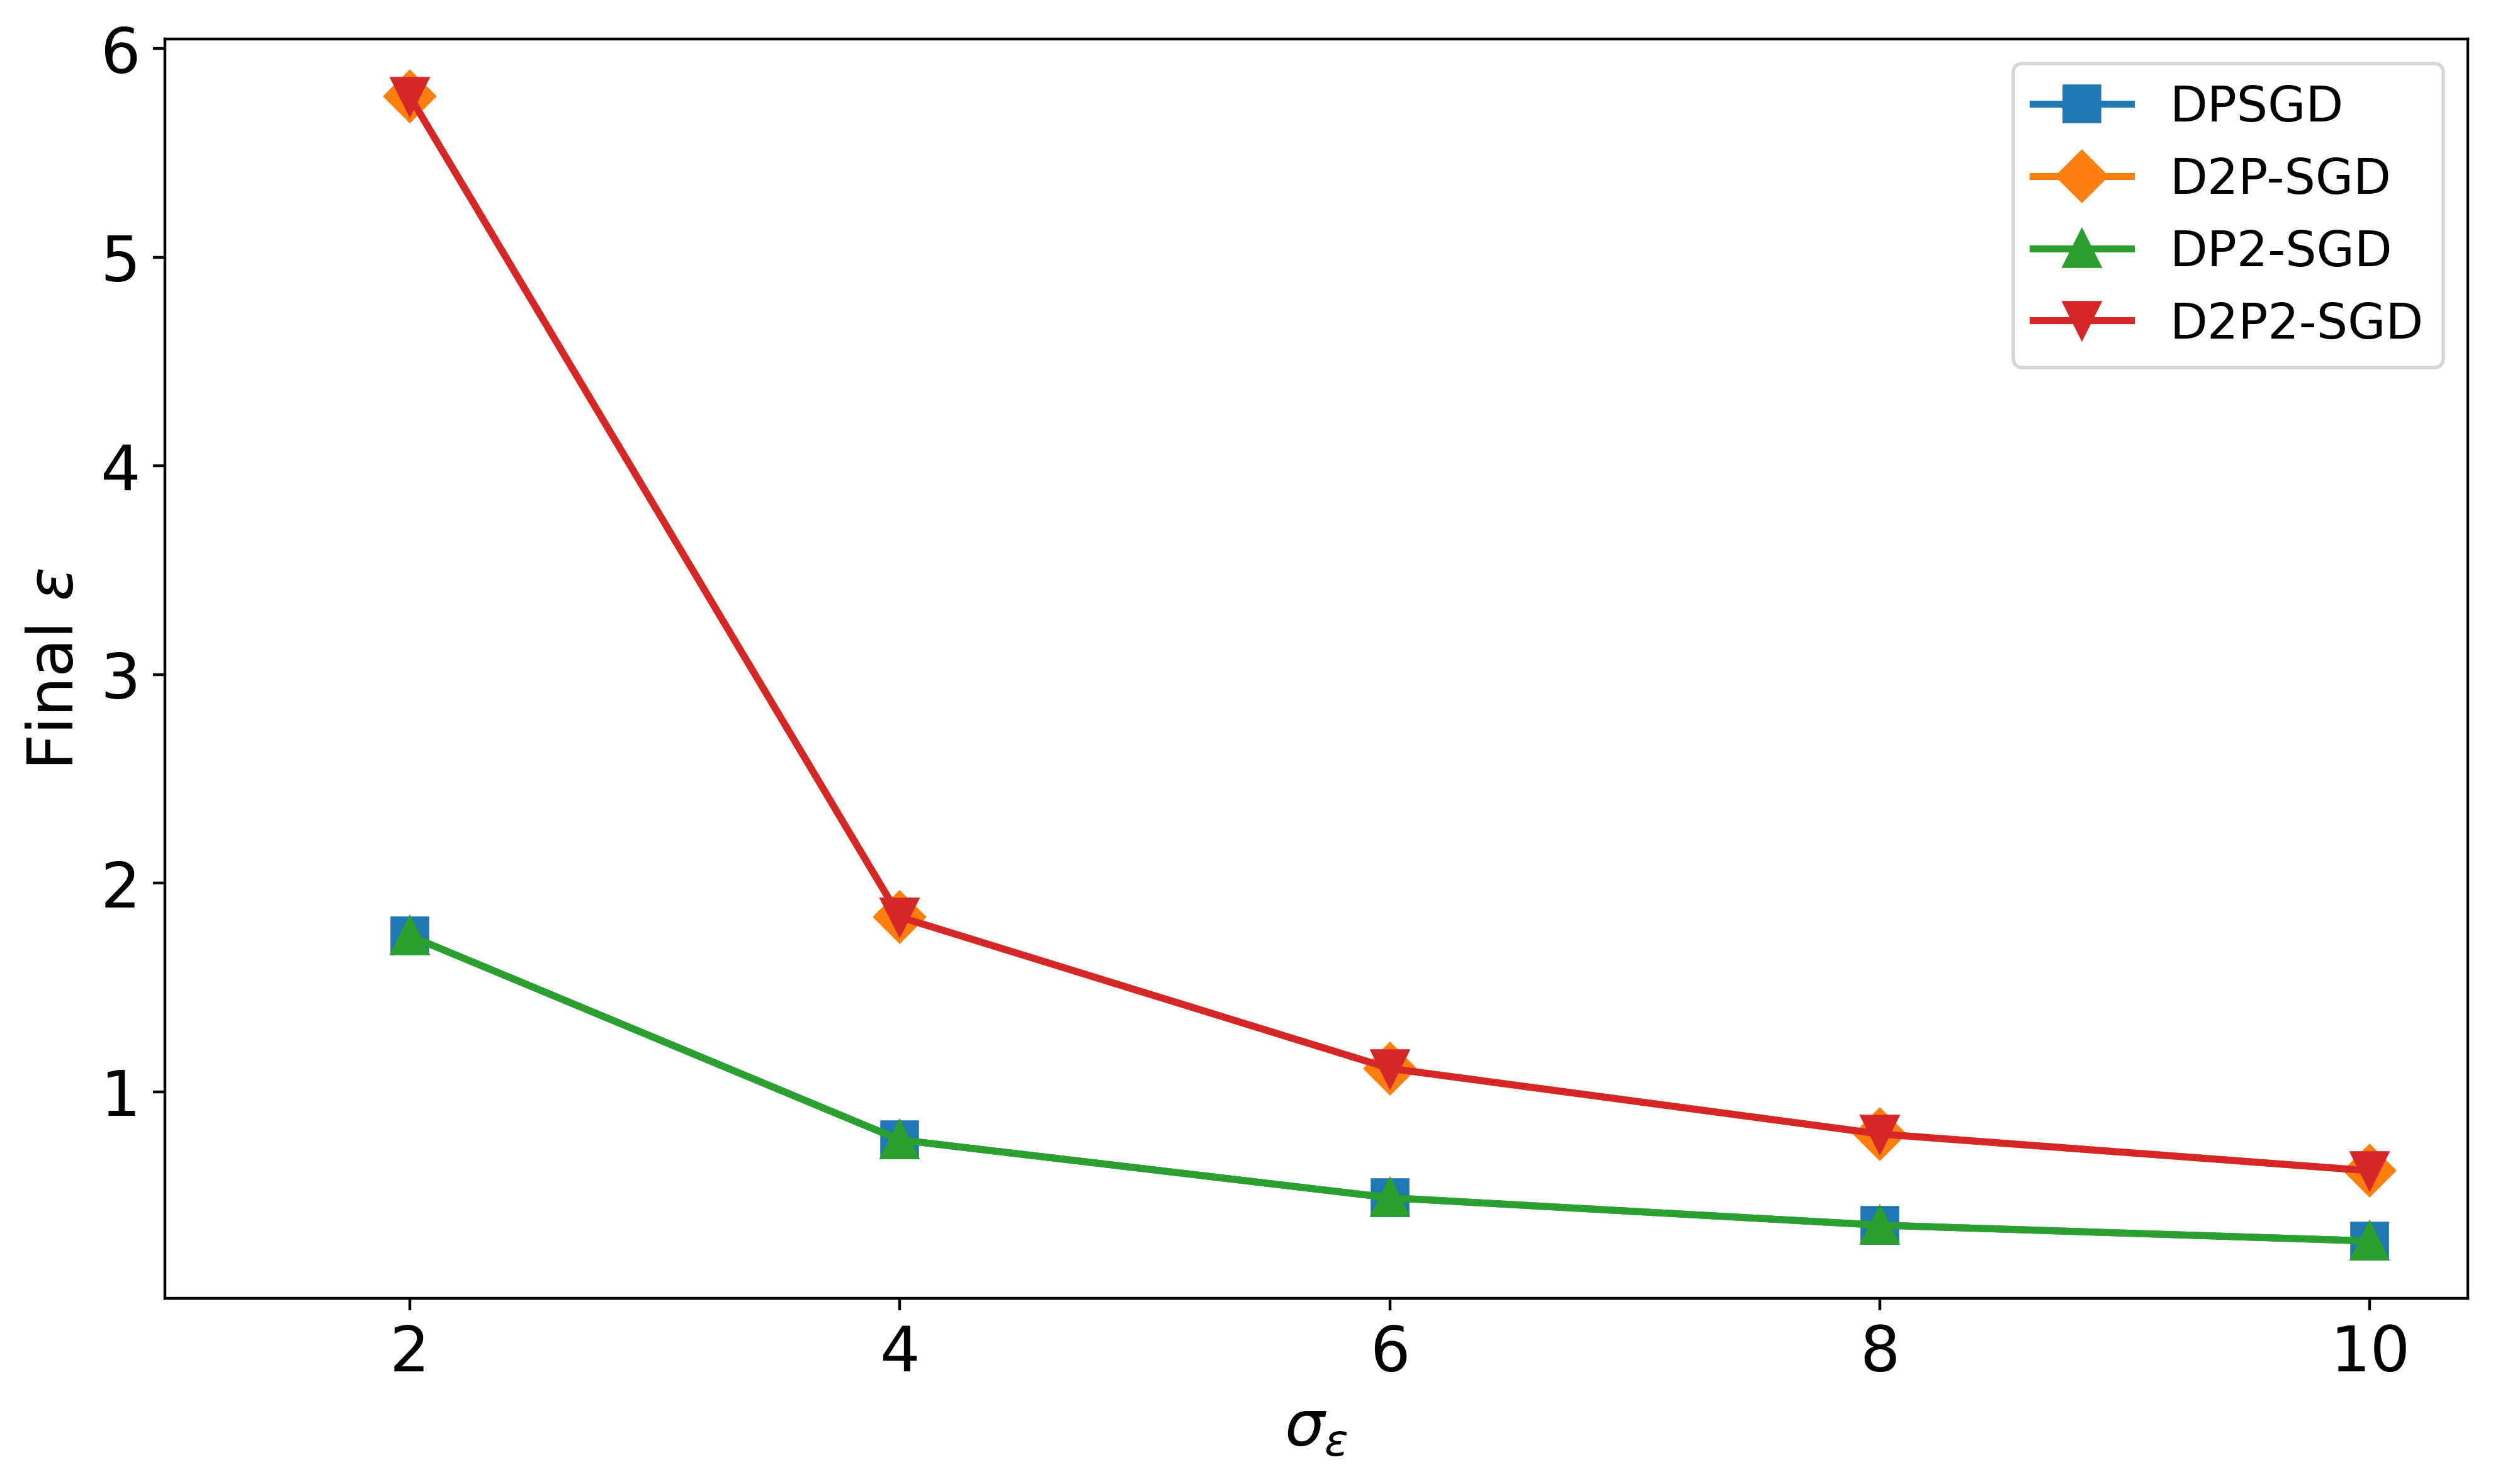

In [152]:
import os
import json
import glob
import matplotlib.pylab as plt


def plot_results(file_paths):
    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    markers = ['o', 's', 'D', '^', 'v']
    marker_dict = {optim: markers[i % len(markers)] for i, optim in enumerate(legend_names.values())}

    # results = {optim: {'sigma': [], 'acc': []} for optim in legend_names.values()}
    results = {optim: [] for optim in legend_names.values()}
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            batch=file_path.split('sigma_')[1].split('_')[2]
            print(batch)
            if batch == str(1024):
                sigma = float(file_path.split('sigma_')[1].split('_')[0])
                train_results = json.load(file)
                
                for optim, data in train_results.items():
                    if optim == 'SGD':
                         continue
                    else:
                    
                        # acc = data['acc'][-1]

                        acc = data['ep'][-1]
                        # results[legend_names[optim]]['sigma'].append(sigma)
                        # results[legend_names[optim]]['acc'].append(acc)
                        results[legend_names[optim]].append([sigma, acc])
                    


    print(results[legend_names[optim]])

    plt.figure(figsize=(10, 6), dpi=400)
    
    for optim, data in results.items():
        if optim == 'SGD':
                         continue
        else:
            # Sort the data based on sigma values
            data_sorted = sorted(data, key=lambda x: x[0])
            print(optim, data_sorted[1:])
            data_sorted = np.array(data_sorted)
            sigmas = data_sorted[:, 0]
            accs = data_sorted[:, 1]
            plt.plot(sigmas, accs, label=optim, linewidth=2, marker=marker_dict[optim], markersize=10)
    
    plt.xticks(np.arange(1, 2.0, 1.0))
    plt.xticks(np.arange(2, 11.0, 2.0))
    # plt.ylim(0, 1.0)
    plt.xlabel(r'$\sigma_{\epsilon}$',fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.ylabel(r'Final $\epsilon$', fontsize=18)
    plt.legend(loc='best', fontsize=14)
    plt.tight_layout()
    plt.savefig('plot/CNN_Fmnist/ab_fmnist_eps_vs_diff_sigma.pdf', bbox_inches='tight', dpi=400)
    plt.show()

# Example usage
file_paths = glob.glob(os.path.join('plot/CNN_Fmnist', '*.json'))
plot_results(file_paths)


{'SGD': {}, 'DPSGD': {}, 'D2P-SGD': {}, 'DP2-SGD': {}, 'D2P2-SGD': {512: [[8.0, 0.5566270195802652], [2.0, 3.9244995338196813], [6.0, 0.7730510683501196], [10.0, 0.4346889990915599], [4.0, 1.2686763412493764]], 1024: [[4.0, 1.8371335578575143], [6.0, 1.1112661133065849], [10.0, 0.62065919464555], [8.0, 0.7969874412757056], [2.0, 5.771240039904349]]}}
[ 2.  4.  6.  8. 10.] [3.92449953 1.26867634 0.77305107 0.55662702 0.434689  ]
[ 2.  4.  6.  8. 10.] [5.77124004 1.83713356 1.11126611 0.79698744 0.62065919]


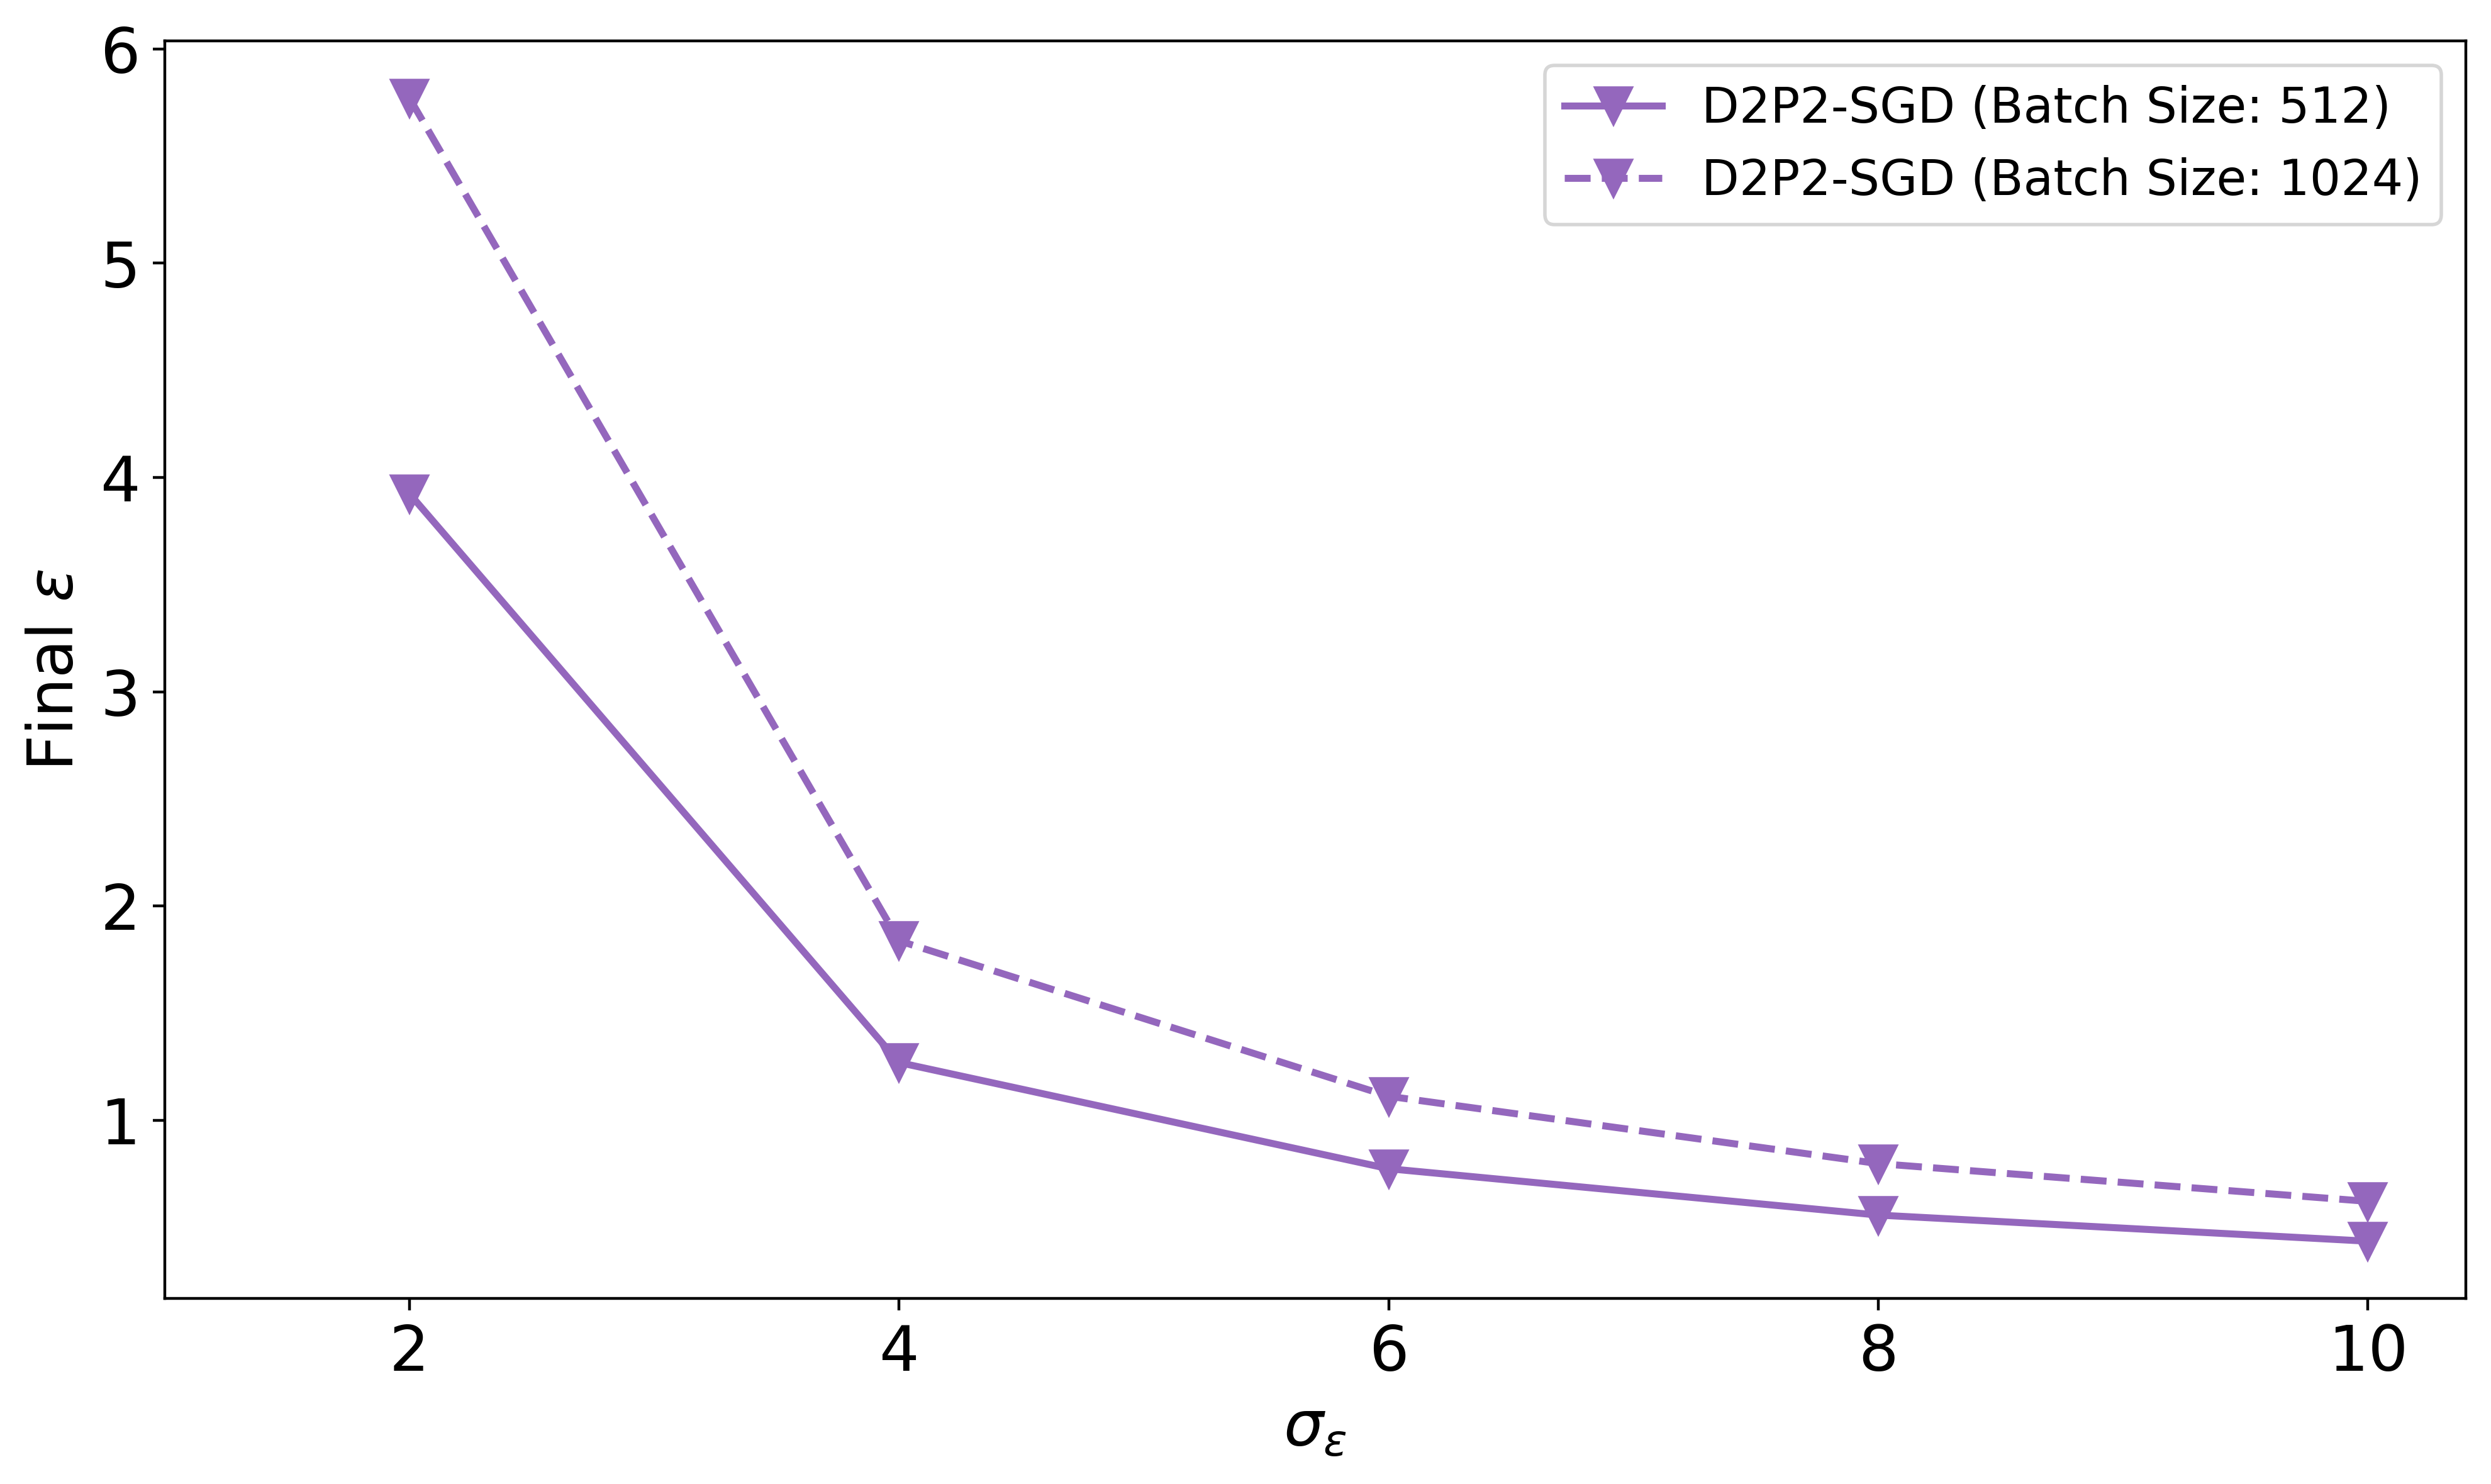

In [24]:
import os
import json
import glob
import matplotlib.pylab as plt
import numpy as np

def plot_results(file_paths):
    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    markers = ['o', 's', 'D', '^', 'v']
    marker_dict = {optim: markers[i % len(markers)] for i, optim in enumerate(legend_names.values())}
    color_dict = {optim: plt.cm.tab10(i) for i, optim in enumerate(legend_names.values())}

    line_styles = ['-', '--', '-.', ':']

    results = {optim: {} for optim in legend_names.values()}  # Dictionary to hold results

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            # Extract sigma and batch size from file path
            sigma = float(file_path.split('sigma_')[1].split('_')[0])
            batch = int(file_path.split('sigma_')[1].split('_')[2])

            if batch == 256:
                 continue
            else:
                # print(sigma, batch)
                train_results = json.load(file)
                for optim, data in train_results.items():
                    if optim == 'DP-SGD(d2p2)':
                        acc = data['ep'][-1]
                        if batch not in results[legend_names[optim]]:
                            results[legend_names[optim]][batch] = []
                        results[legend_names[optim]][batch].append([sigma, acc])
                    else:
                        continue
                        
    print(results)

    plt.figure(figsize=(10, 6), dpi=400)
    for optim, data in results.items():
        for i, (batch_size, acc_data) in enumerate(data.items()):
            acc_data_sorted = sorted(acc_data, key=lambda x: x[0])  # Sort based on sigma
            acc_data_sorted = np.array(acc_data_sorted)
            sigmas = acc_data_sorted[:, 0]
            accs = acc_data_sorted[:, 1]

            print(sigmas, accs)

            plt.plot(sigmas, accs, label=f'{optim} (Batch Size: {batch_size})', linewidth=2,
                     marker=marker_dict[optim], markersize=10, color=color_dict[optim], linestyle=line_styles[i])

    plt.xticks(np.arange(1, 2.0, 1.0))
    plt.xticks(np.arange(2, 11.0, 2.0))
    plt.xlabel(r'$\sigma_{\epsilon}$', fontsize=18)
    plt.ylabel(r'Final $\epsilon$', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(loc='best', fontsize=14)
    plt.tight_layout()
    # plt.show()
    plt.savefig('ab1/CNN_Fmnist/ab_fmnist_batch_size.pdf', bbox_inches='tight', dpi=400)


# Example usage
file_paths = glob.glob(os.path.join('ab1/CNN_Fmnist', '*.json'))
plot_results(file_paths)


In [36]:
import os
import json
import glob
import matplotlib.pylab as plt
import numpy as np

def plot_results(file_paths):
    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    markers = ['o', 's', 'D', '^', 'v']
    marker_dict = {optim: markers[i % len(markers)] for i, optim in enumerate(legend_names.values())}
    color_dict = {optim: plt.cm.tab10(i) for i, optim in enumerate(legend_names.values())}

    line_styles = ['-', '--', '-.', ':']

    results = {optim: {} for optim in legend_names.values()}  # Dictionary to hold results

    for file_path in file_paths:
        print(file_path)
        with open(file_path, 'r') as file:
            # Extract sigma and batch size from file path
            sigma = float(file_path.split('sigma_')[1].split('_')[0])
            rate = file_path.split('rrate_')[1].split('.json')[0]

            print(sigma, rate)
            train_results = json.load(file)
            for optim, data in train_results.items():
                if optim == 'DP-SGD(d2p2)':
                    acc = data['acc'][-1]
                    eps = data['ep'][-1]

                    print(acc, eps)
                    if rate not in results[legend_names[optim]]:
                        results[legend_names[optim]][rate] = []
                    results[legend_names[optim]][rate].append([sigma, acc])
                else:
                    continue
                        
    print(results)

    # plt.figure(figsize=(10, 6), dpi=400)
    # for optim, data in results.items():
    #     for i, (batch_size, acc_data) in enumerate(data.items()):
    #         acc_data_sorted = sorted(acc_data, key=lambda x: x[0])  # Sort based on sigma
    #         acc_data_sorted = np.array(acc_data_sorted)
    #         sigmas = acc_data_sorted[:, 0]
    #         accs = acc_data_sorted[:, 1]

    #         print(sigmas, accs)

    #         plt.plot(sigmas, accs, label=f'{optim} (Batch Size: {batch_size})', linewidth=2,
    #                  marker=marker_dict[optim], markersize=10, color=color_dict[optim], linestyle=line_styles[i])

    # plt.xticks(np.arange(1, 2.0, 1.0))
    # plt.xticks(np.arange(2, 11.0, 2.0))
    # plt.xlabel(r'$\sigma_{\epsilon}$', fontsize=18)
    # plt.ylabel(r'Final $\epsilon$', fontsize=18)
    # plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.legend(loc='best', fontsize=14)
    # plt.tight_layout()
    # # plt.show()
    # plt.savefig('ab1/CNN_Fmnist/ab_fmnist_batch_size.pdf', bbox_inches='tight', dpi=400)


# Example usage
file_paths = glob.glob(os.path.join('rrate/CNN_svhn', '*.json'))
plot_results(file_paths)


rrate/CNN_svhn/2024-05-22 08:12:14_sigma_3.0_batch_1024_seed_33_rrate_0.7.json
3.0 0.7
0.7807698217578365 2.5116691333339967
rrate/CNN_svhn/2024-05-22 07:17:54_sigma_3.0_batch_1024_seed_33_rrate_0.5.json
3.0 0.5
0.7880685310387215 2.5116691333339967
rrate/CNN_svhn/2024-05-22 06:23:07_sigma_3.0_batch_1024_seed_33_rrate_0.3.json
3.0 0.3
0.7920251997541488 2.5116691333339967
rrate/CNN_svhn/2024-05-22 05:27:56_sigma_3.0_batch_1024_seed_33_rrate_0.1.json
3.0 0.1
0.7816149354640443 2.5116691333339967
rrate/CNN_svhn/2024-05-22 09:09:35_sigma_3.0_batch_1024_seed_33_rrate_0.9.json
3.0 0.9
0.781499692685925 2.5116691333339967
{'SGD': {}, 'DPSGD': {}, 'D2P-SGD': {}, 'DP2-SGD': {}, 'D2P2-SGD': {'0.7': [[3.0, 0.7807698217578365]], '0.5': [[3.0, 0.7880685310387215]], '0.3': [[3.0, 0.7920251997541488]], '0.1': [[3.0, 0.7816149354640443]], '0.9': [[3.0, 0.781499692685925]]}}


rrate/CNN_svhn/2024-05-22 08:12:14_sigma_3.0_batch_1024_seed_33_rrate_0.7.json
rrate/CNN_svhn/2024-05-22 07:17:54_sigma_3.0_batch_1024_seed_33_rrate_0.5.json
rrate/CNN_svhn/2024-05-22 06:23:07_sigma_3.0_batch_1024_seed_33_rrate_0.3.json
rrate/CNN_svhn/2024-05-22 05:27:56_sigma_3.0_batch_1024_seed_33_rrate_0.1.json
rrate/CNN_svhn/2024-05-22 09:09:35_sigma_3.0_batch_1024_seed_33_rrate_0.9.json


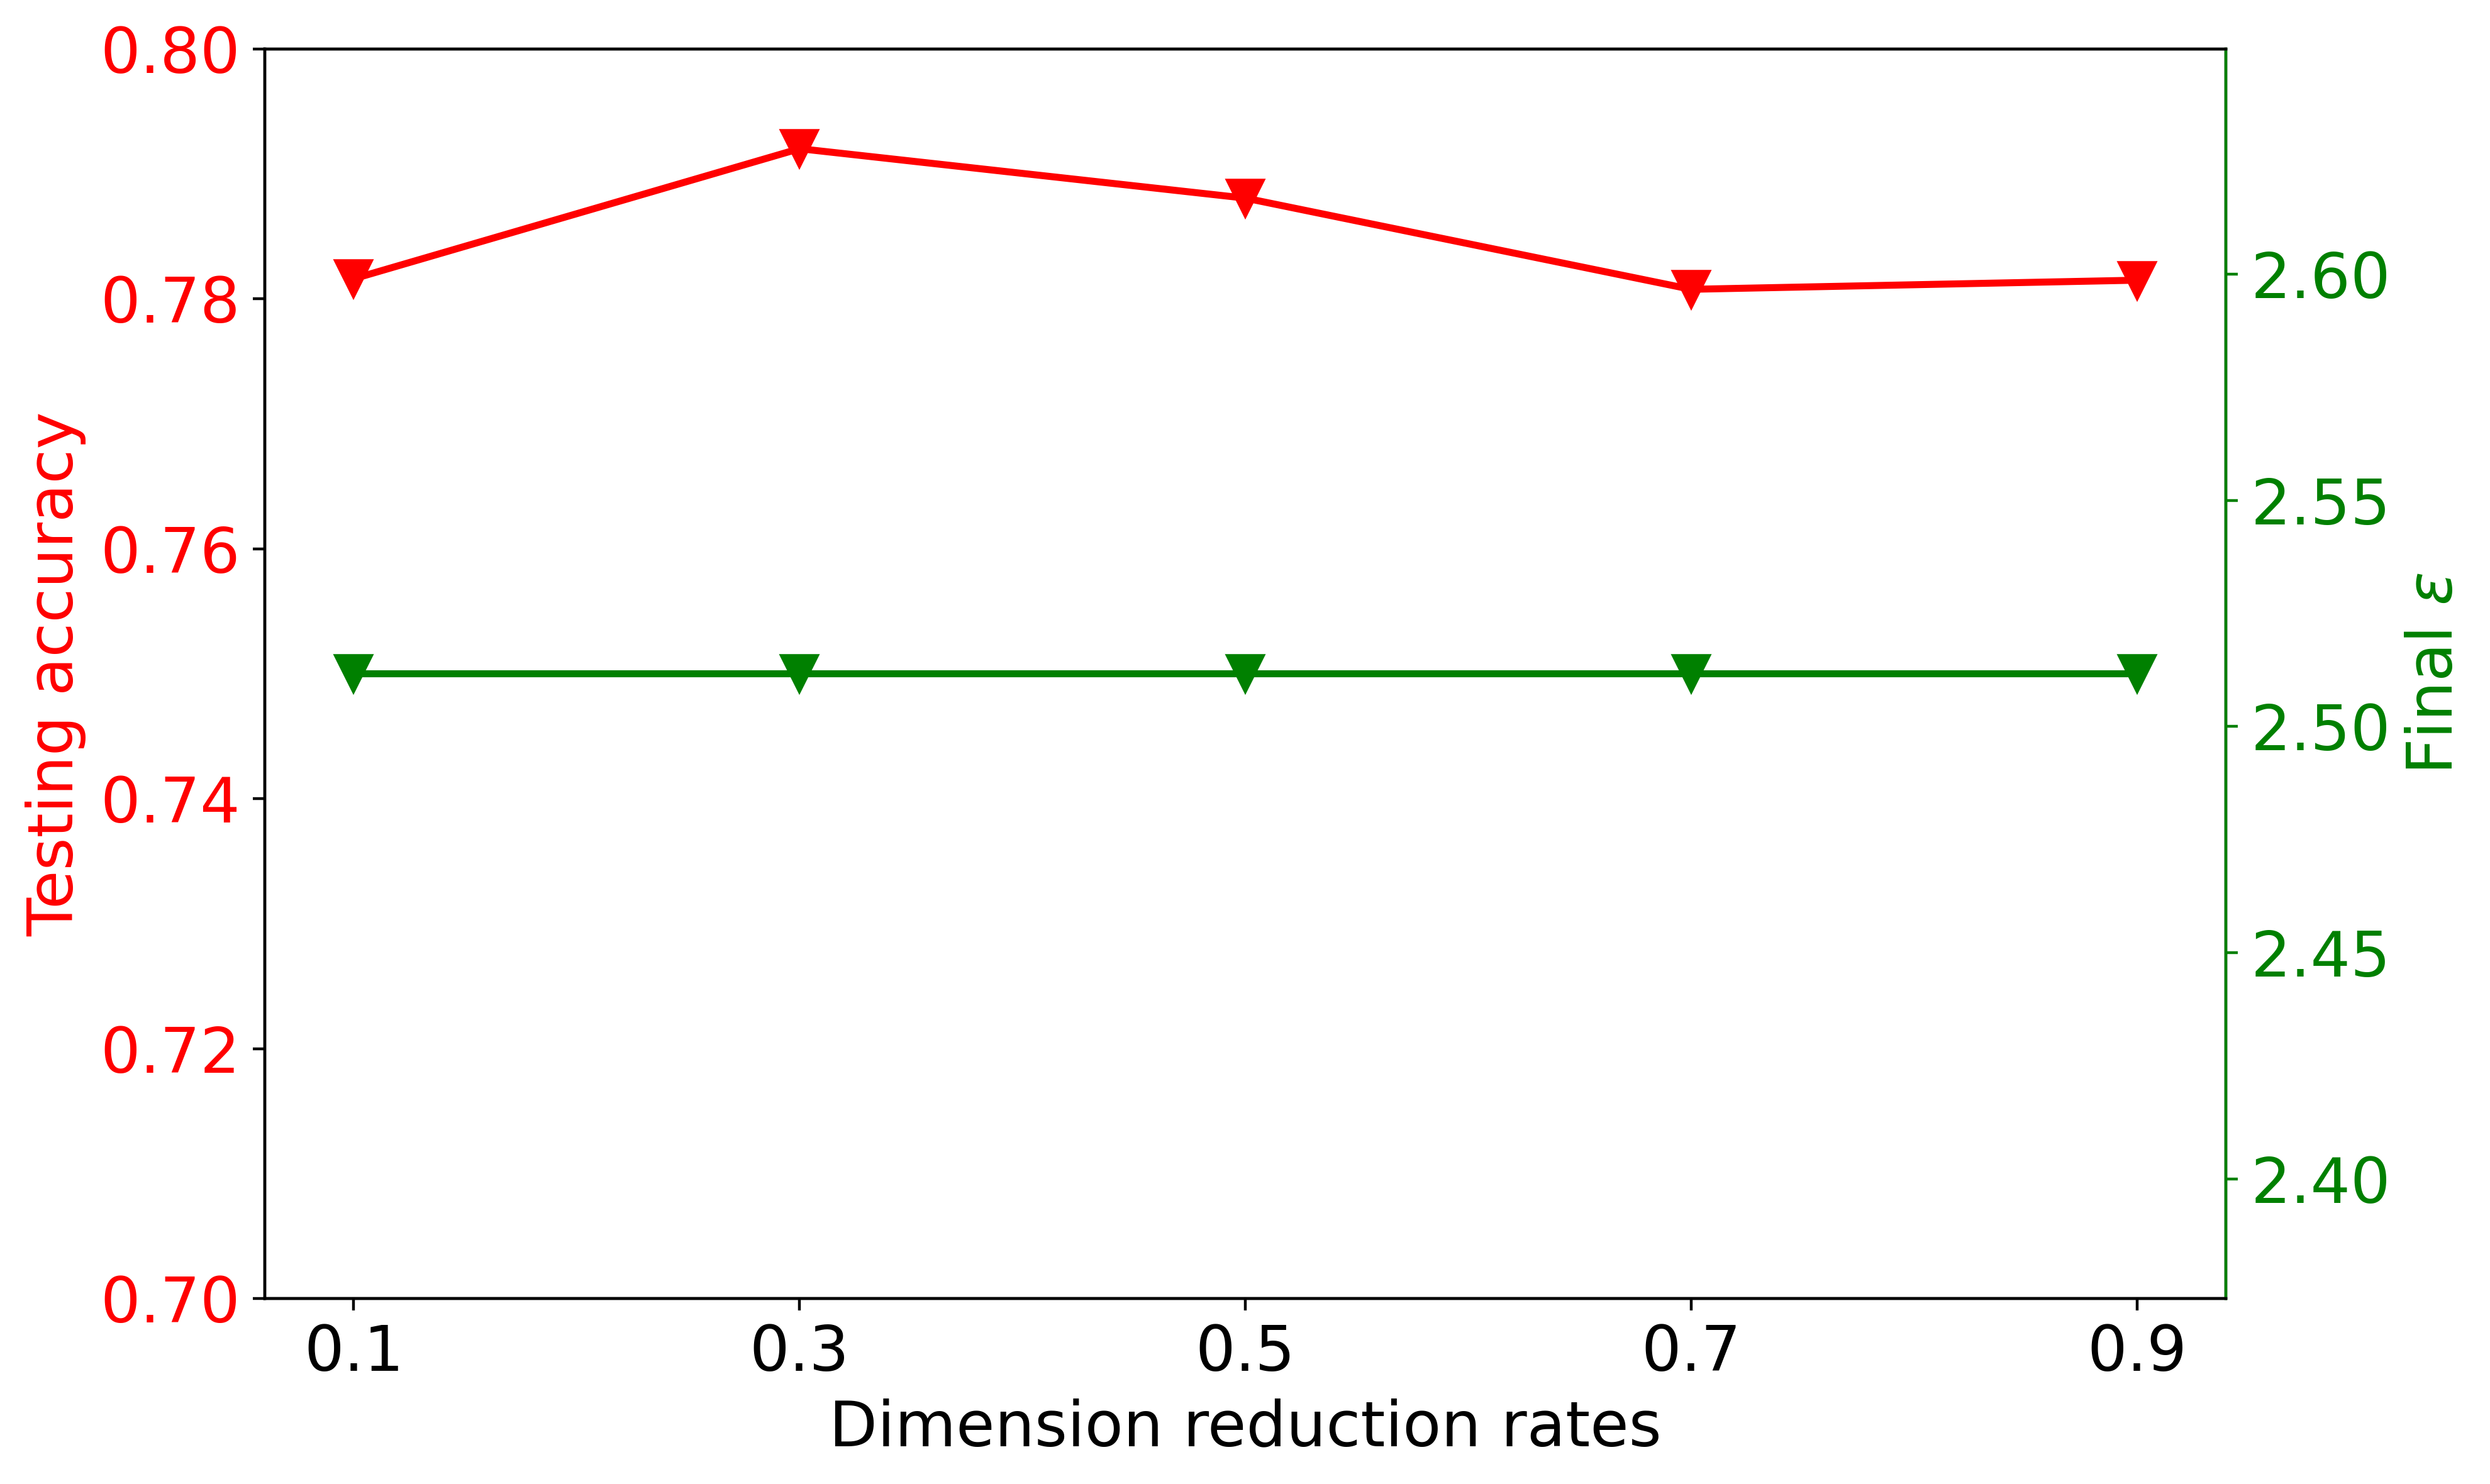

In [127]:
import os
import json
import glob
import matplotlib.pylab as plt
import numpy as np

def plot_results(file_paths):
    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    markers = ['o', 's', 'D', '^', 'v']
    marker_dict = {optim: markers[i % len(markers)] for i, optim in enumerate(legend_names.values())}
    color_dict = {optim: plt.cm.tab10(i) for i, optim in enumerate(legend_names.values())}

    line_styles = ['-', '--', '-.', ':']

    results = {optim: [] for optim in legend_names.values()}  # Dictionary to hold results

    for file_path in file_paths:
        print(file_path)
        with open(file_path, 'r') as file:
            # Extract sigma and rate from file path
            sigma = float(file_path.split('sigma_')[1].split('_')[0])
            rate = float(file_path.split('rrate_')[1].split('.json')[0])  # Assuming rate is a float

            # print(sigma, rate)
            train_results = json.load(file)
            for optim, data in train_results.items():
                if optim == 'DP-SGD(d2p2)':
                    acc = data['acc'][-1]
                    eps = data['ep'][-1]
                    # print(optim, acc, eps)
                    results[legend_names[optim]].append([rate, acc, eps])
                else:
                    continue
                        
    plt.figure(figsize=(10, 6), dpi=400)
    for optim, data in results.items():
        if data:
            data_sorted = sorted(data, key=lambda x: x[0])  # Sort based on rate
            data_sorted = np.array(data_sorted)
            rates = data_sorted[:, 0]
            accs = data_sorted[:, 1]
            eps = data_sorted[:, 2]

            plt.plot(rates, accs, label=f'{optim} Accuracy', linewidth=2,
                     marker=marker_dict[optim], markersize=10, color='red')
            plt.xlabel('Dimension reduction rates', fontsize=18)
            plt.ylabel('Testing accuracy', fontsize=18,  color='red')
            plt.yticks(fontsize=18, color='red')
            plt.xticks(fontsize=18)
            plt.ylim(0.7, 0.8)
            
            # Create twin axes for epsilon
            ax2 = plt.twinx()
            ax2.spines['right'].set_color('green')  # Set color for right y-axis spine
            ax2.tick_params(axis='y', colors='green')  # Set color for right y-axis ticks
            ax2.set_ylabel(r'Final $\epsilon$', fontsize=18, color='green')
            
            # Plot epsilon with green color
            ax2.plot(rates, eps, label=f'{optim} Epsilon', linewidth=2,
                     marker=marker_dict[optim], markersize=10, color='green')
            
            plt.xticks(np.arange(min(rates), max(rates) + 0.1, 0.2), fontsize=18)
            plt.tick_params(axis='both', which='major', labelsize=18)

    plt.tight_layout()
    # plt.show()
    plt.savefig('rrate/CNN_svhn/svhn_reduction_rate.pdf', bbox_inches='tight', dpi=400)

    

# Example usage
file_paths = glob.glob(os.path.join('rrate/CNN_svhn', '*.json'))
plot_results(file_paths)


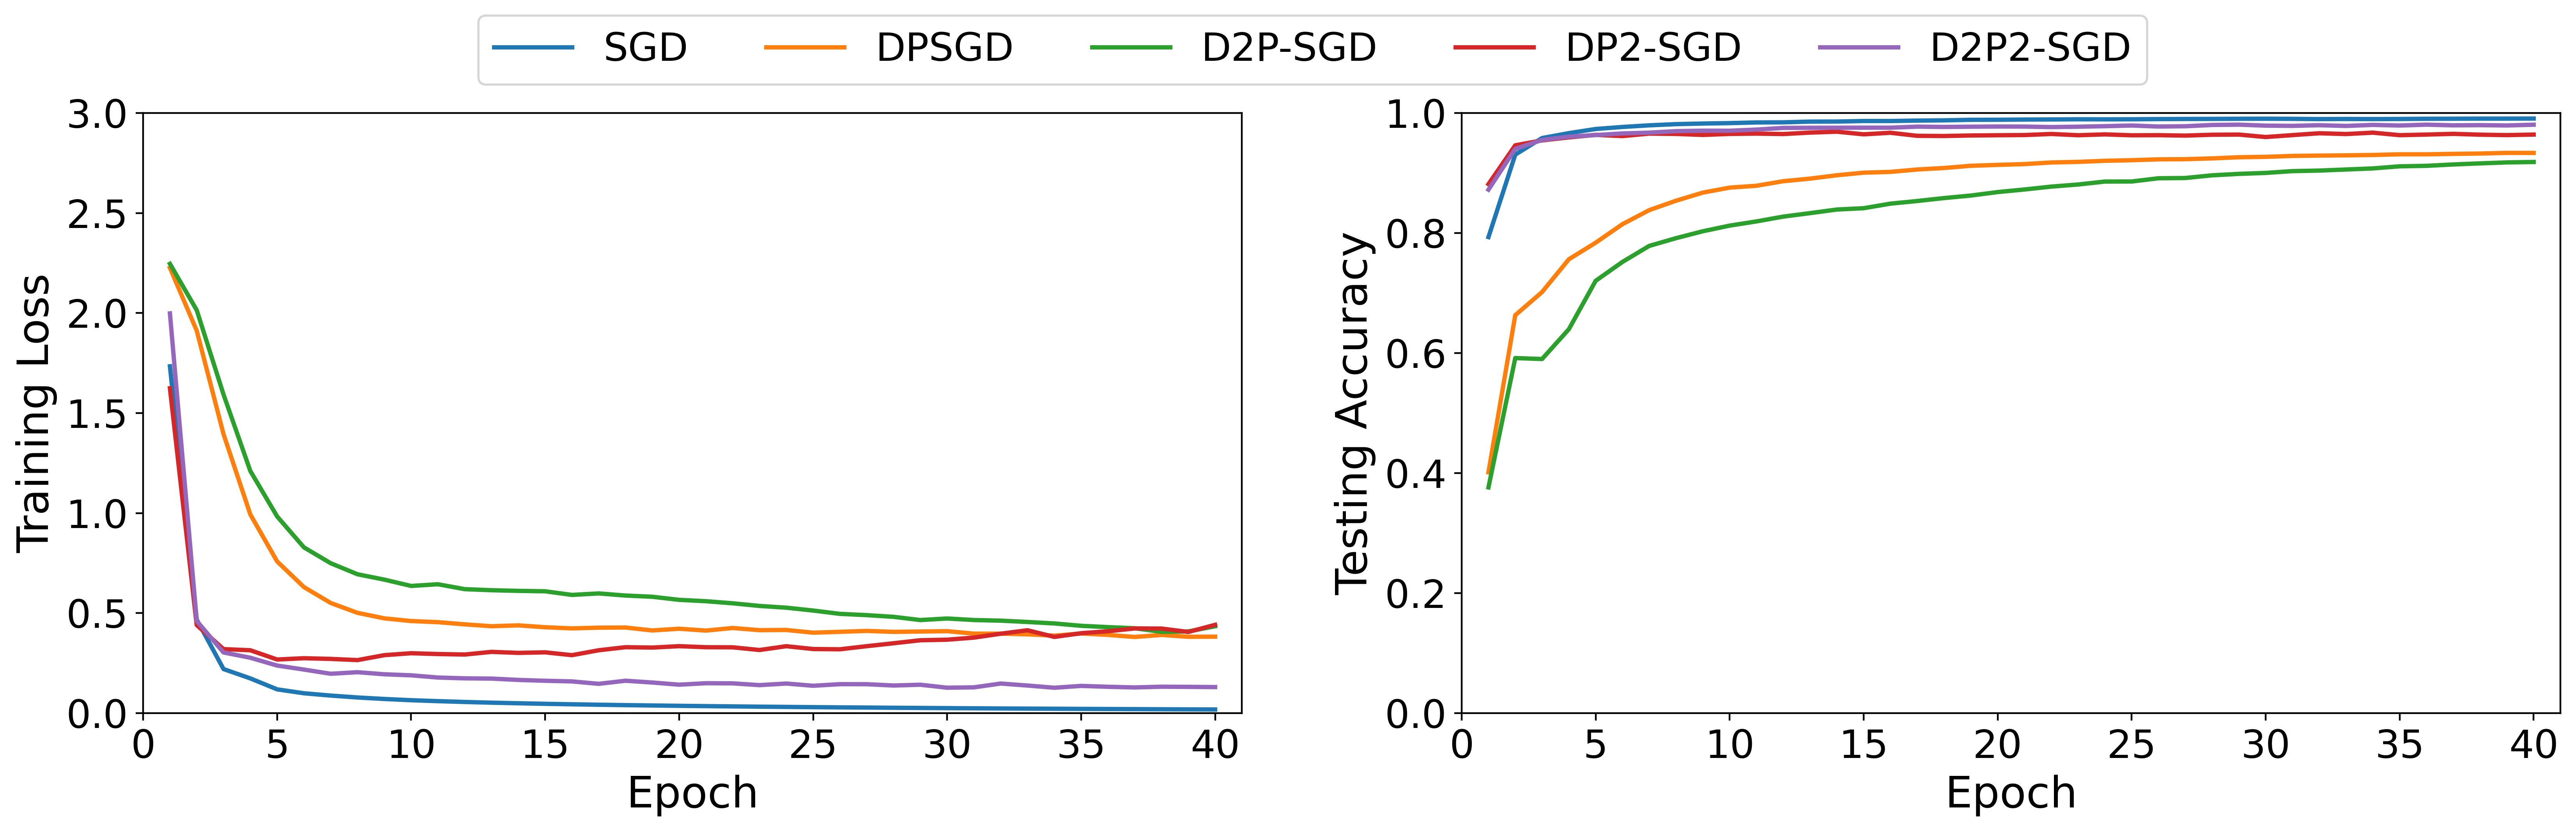

In [176]:
import os
import json
import glob
import argparse
import matplotlib.pylab as plt
import numpy as np
import torch
from collections import OrderedDict
import torch.backends.cudnn as cudnn


def plot_results(file_paths):
    

    legend_names = {
        'SGD': 'SGD',
        'DP-SGD(static)': 'DPSGD',
        'DP-SGD(dynamic)': 'D2P-SGD',
        'DP-SGD(RP)': 'DP2-SGD',
        'DP-SGD(d2p2)': 'D2P2-SGD'
    }

    # Load data from the JSON files
    all_train_losses = []
    all_accuracy_per_epoch = []
    all_epsilons =[]

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            train_results = json.load(file)
            
            train_losses = []
            accuracy_per_epoch = []
            epsilons = []
            
            for optim, data in train_results.items():
                losses = data['loss']
                acc = data['acc']
                eps = data['ep']
                train_losses.append(losses)
                accuracy_per_epoch.append(acc)
                epsilons.append(eps)
            
            all_train_losses.append(train_losses)
            all_accuracy_per_epoch.append(accuracy_per_epoch)
            all_epsilons.append(epsilons)

    # Convert lists to numpy arrays for easier manipulation
    all_train_losses = np.array(all_train_losses)
    all_accuracy_per_epoch = np.array(all_accuracy_per_epoch)
    all_epsilons = np.array(all_epsilons)

    # Calculate mean and variance
    mean_train_losses = np.mean(all_train_losses, axis=0)
    var_train_losses = np.var(all_train_losses, axis=0)
    mean_accuracy_per_epoch = np.mean(all_accuracy_per_epoch, axis=0)
    var_accuracy_per_epoch = np.var(all_accuracy_per_epoch, axis=0)
    mean_epsilons = np.mean(all_epsilons, axis=0)
    var_epsilons = np.var(all_epsilons, axis=0)


    epochs = range(1, mean_train_losses.shape[1] + 1)
    fig, axs = plt.subplots(1, 2, figsize=(20, 5), dpi=400)

    # Plot training losses
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_losses = mean_train_losses[i]
        std_losses = np.sqrt(var_train_losses[i])
        # color = list_color[i % len(list_color)]
        axs[0].plot(epochs, mean_losses, label=label, linewidth=2)
        axs[0].fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, alpha=0.2)

    axs[0].set_xlabel('Epoch', fontsize=20)
    axs[0].set_ylabel('Training Loss', fontsize=20)
    axs[0].tick_params(axis='both', which='major', labelsize=18)
    axs[0].set_xlim([0, len(epochs) + 1])
    axs[0].set_ylim([0, 3.0])
    fig.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.5, 1.03), ncol=5)

    # Plot testing accuracies
    for i, (optim, _) in enumerate(train_results.items()):
        label = legend_names.get(optim, optim)
        mean_acc = mean_accuracy_per_epoch[i]
        std_acc = np.sqrt(var_accuracy_per_epoch[i])
        
        # color = list_color[i % len(list_color)]
        axs[1].plot(epochs, mean_acc, label=label, linewidth=2)
        axs[1].fill_between(epochs, mean_acc - std_acc, mean_acc + std_acc, alpha=0.2)

    axs[1].set_xlabel('Epoch', fontsize=20)
    axs[1].set_ylabel('Testing Accuracy', fontsize=20)
    axs[1].tick_params(axis='both', which='major', labelsize=18)
    axs[1].set_xlim([0, len(epochs) + 1])
    axs[1].set_ylim([0, 1.0])
    axs[1].set_yticks(np.arange(0, 1.1, 0.2))

    # # Plot epsilons
    # colors = ['#FF0000', '#0000FF']  # Red for static, Blue for dynamic
    # labels = ["static", "dynamic"]
    
    # for i, (optim, _) in enumerate(train_results.items()):
    #     if 'static' in optim or 'dynamic' in optim:
    #         label = labels[0] if 'static' in optim else labels[1]
    #         color = colors[0] if 'static' in optim else colors[1]
    #         mean_eps = mean_epsilons[i]
    #         std_eps = np.sqrt(var_epsilons[i])
    #         axs[2].plot(epochs, mean_eps, label=label, linewidth=2, color=color)
    #         axs[2].fill_between(epochs, mean_eps - std_eps, mean_eps + std_eps, color=color, alpha=0.2)

    # axs[2].set_xlabel('Epoch', fontsize=20)
    # axs[2].set_ylabel(r'$\epsilon$', fontsize=20)
    # axs[2].tick_params(axis='both', which='major', labelsize=18)
    # axs[2].set_xlim([0, len(epochs) + 1])
    # axs[2].set_ylim([0, 3.0])
    # axs[2].legend(loc='upper left', fontsize=15)

    # plt.show()
    plt.savefig('ad2/mnist_sigma1_b1024.pdf', bbox_inches='tight', dpi=400)


file_paths = ['/home/zahid/work/d2p2_new/d2p2sgd/log/CNN_mnist/P200_red30_2024-05-20 22:34:39_sigma_1.0_batch_1024_seed_22.json']



# file_paths = glob.glob(os.path.join('final/CNN_Fmnist', '*.json'))
plot_results(file_paths)
